## Demonstration of the pipeline

#### All you need to do is create a configuration file (your_conf.ini) according to example_conf.ini and execute:
```bash
python wrap.py your_conf.ini N_i N_f 
```
where N_i and Nf are just two integers to identify the initial and final numbers used as identifications for the mocks.

#### Below we go through the procedures of the pipeline.

In [152]:
import os
import configparser
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

#### The configuration file contains all the relevant information you should need to input, so lets look at it:

In [153]:
cf_nm = 'example_conf.ini'
# CONFIGURATION
cfg = configparser.ConfigParser()
cfg.read(cf_nm)
D = dict(cfg['default'])
D_o = dict(cfg['optional'])   # Optional configurations

In [154]:
print('Default keywords:\n')
D

Default keywords:



{'size': '400',
 'size_info': "'Size of the cutout in pixels'",
 'outpath': 'point_061516_r',
 'outpath_info': "'Output directory to save mock galaxies'",
 'image': '/home/rodrigoff96/sync_out/siens/UDGs_Marco/point_061516_r.fits',
 'image_info': "'Image used as background for the mock galaxies'",
 'multi_ext': 'yes',
 'multi_ext_info': "'yes/no for if the image is a multiextension FITS file.'",
 'psf': "'psfs/psf_gaussian_061516_r.fits'",
 'dec_min': '-7.7501961',
 'dec_max': '-6.5041385',
 'dec_info': "'Minimum and maximum declination values (degrees)'",
 'ra_min': '151.62924',
 'ra_max': '152.19335',
 'ra_info': "'Minimum and maximum right ascension values (degrees)'"}

In [155]:
print('Optional keywords:\n')
D_o

Optional keywords:



{'wht_image': '/home/rodrigoff96/sync_out/siens/UDGs_Marco/osw_point_061516_r.fits',
 'wht_image_info': "'Weight of the image used as background for the mock galaxies'",
 'm_cdf': 'data/CDF_M_g_carlsten_2020.npy',
 'm_cdf_info': "'Cumulative distribution for absolute magnitude'",
 'm_bins': 'data/M_g_carlsten_2020.npy',
 'm_bins_info': "'Bins to'"}

#### Below we interactively replicate the lines executed in wrap.py

In [156]:
Ni = 0  # Starting ID number for mock galaxies
Nf = 1  # Ending ID number for mock galaxies

outPath = str(D['outpath'])    # Output directory to save mock galaxy directories
if(os.path.exists(outPath)):
    os.system('rm -r {0}'.format(outPath))
    os.system('mkdir {0}'.format(outPath))
else:
    os.system('mkdir {0}'.format(outPath))

### First we cut a region of the larger image:

#### 	 gal0 	 ####
Cutting stamp from pointing...

#####################################################################


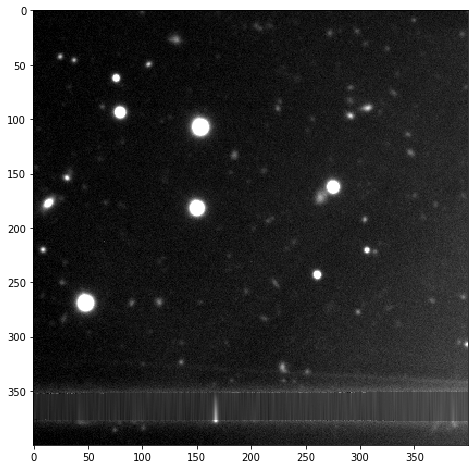

#### 	 gal1 	 ####
Cutting stamp from pointing...

#####################################################################


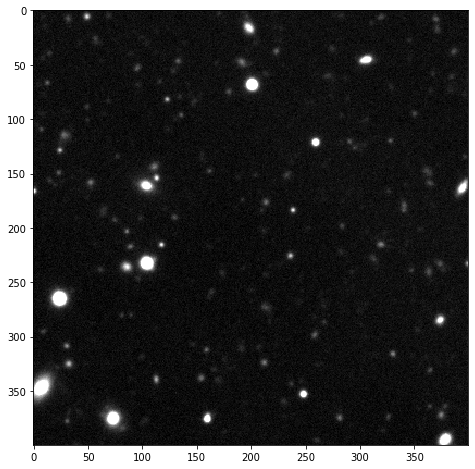

In [157]:
# for each N mock
for N in range(Ni,Nf+1):
    drt = outPath+'/gal{0}'.format(N)
    print('#### \t gal{0} \t ####'.format(N))
    if(os.path.exists(drt)):
        os.system('rm -r {0}'.format(drt))
        os.system('mkdir {0}'.format(drt))
    else:
        os.system('mkdir {0}'.format(drt))

    print('Cutting stamp from pointing...\n')
    os.system('python cut.py {0} {1}'.format(cf_nm,N))
    print('#####################################################################')
    
    dt = fits.getdata('{0}/cut_gal{1}.fits'.format(drt,N))
    
    fig = plt.figure(figsize=(8,8))
    plt.imshow(dt,cmap='gray',vmin=np.percentile(dt,1.5),vmax=np.percentile(dt,99.5))
    plt.show()

### Then we put our mock galaxies in the center:

#### 	 gal0 	 ####
Generating random parameters for mock galaxy...

#####################################################################
Create model image, apply noise, convolve with PSF...

#####################################################################


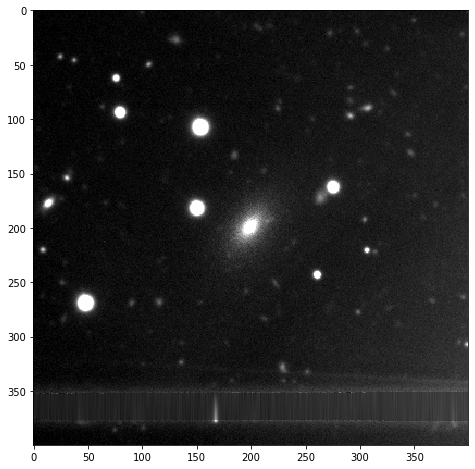

#### 	 gal1 	 ####
Generating random parameters for mock galaxy...

#####################################################################
Create model image, apply noise, convolve with PSF...

#####################################################################


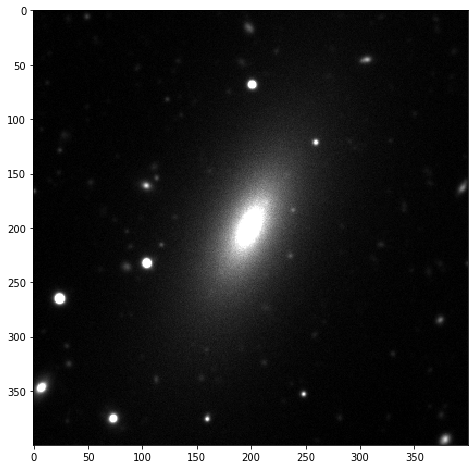

In [158]:
# for each N mock
for N in range(Ni,Nf+1):
    drt = outPath+'/gal{0}'.format(N)
    print('#### \t gal{0} \t ####'.format(N))

    print('Generating random parameters for mock galaxy...\n')
    os.system('python gen_pars.py {0} {1}'.format(cf_nm,N))
    print('#####################################################################')
    
    print('Create model image, apply noise, convolve with PSF...\n')
    os.system('python gen_mock.py {0} {1}'.format(cf_nm,N))
    print('#####################################################################')

    dt = fits.getdata('{0}/mock_gal{1}.fits'.format(drt,N))
    
    fig = plt.figure(figsize=(8,8))
    plt.imshow(dt,cmap='gray',vmin=np.percentile(dt,1.5),vmax=np.percentile(dt,99.5))
    plt.show()

### Feel free to use and modify :) 